In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Car-Price-Prediction/master/car%20data.csv')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [67]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [68]:
df.drop('Car_Name', inplace = True, axis = 1)

In [69]:
df['current_year'] = 2021
df['years_used'] = df['current_year']-df['Year']

In [70]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,years_used
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [71]:
df.drop('Year', inplace = True, axis = 1)

In [72]:
df.drop('current_year', inplace = True, axis = 1)

In [73]:
cat_columns = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df[cat_columns]:
  df[i] = le.fit_transform(df[i])

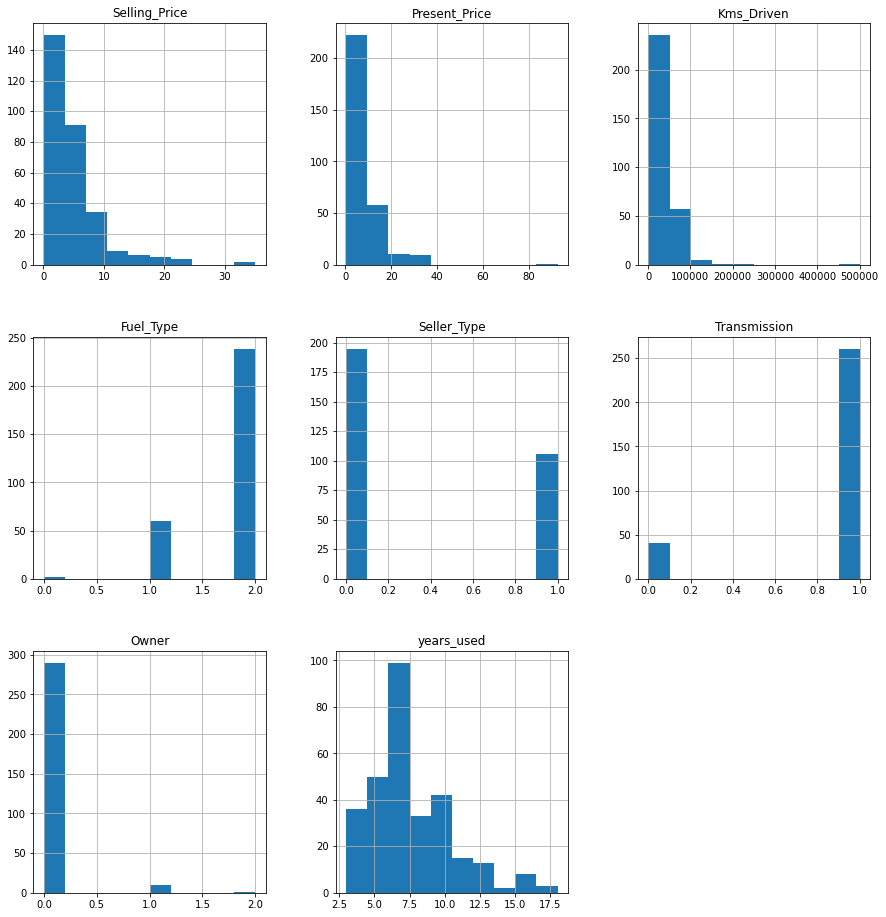

In [74]:
df.hist(figsize= (15,16))
plt.show()

<AxesSubplot:>

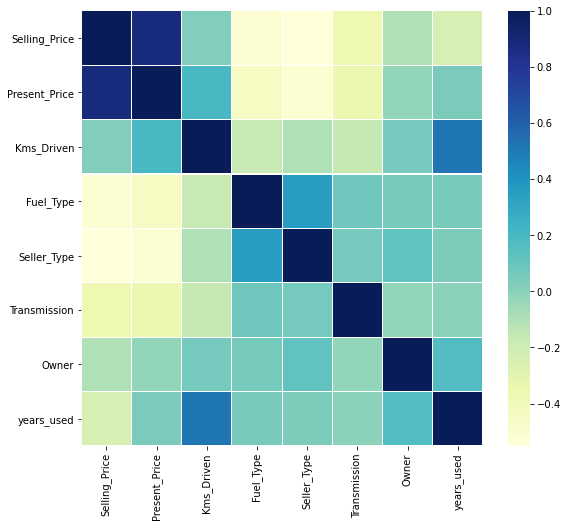

In [75]:
corrmat = df.corr() 
 
  
 
f, ax = plt.subplots(figsize =(9, 8))
 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

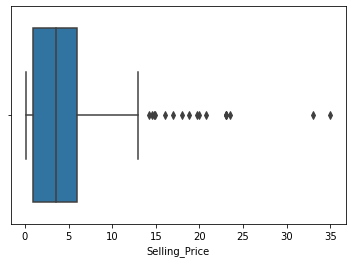

In [76]:
sns.boxplot(df['Selling_Price'])

In [79]:
for x in ['Selling_Price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    

In [80]:
df.dropna(inplace=True)

In [81]:

X=df.drop(columns = ['Selling_Price'], axis=1).copy()
y=df['Selling_Price'].copy()

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [83]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

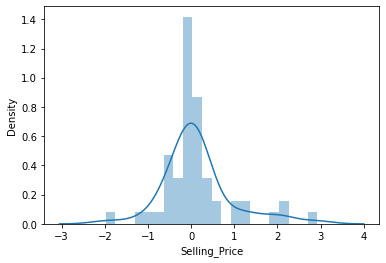

In [85]:
sns.distplot(y_test-pred)

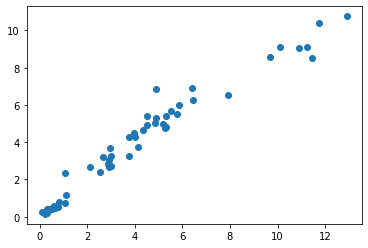

In [86]:
plt.scatter(y_test,pred)

In [87]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.5013403508771942
MSE: 0.6557564122807057
RMSE: 0.8097878810408968


In [88]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.9438444213180364


In [89]:
import pickle
file = open('rf_model5.pkl', 'wb')

pickle.dump(model, file)

In [90]:
X_train.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_used
49,9.29,37000,2,0,0,0,4
71,12.48,45000,1,0,1,0,10
192,0.75,49000,2,1,1,1,14
164,0.54,14000,2,1,1,0,5
241,7.13,35866,2,0,1,1,6


In [103]:
model.predict([[10, 30000, 1, 0, 1, 0, 4]])

array([7.99])

In [92]:
X_train.describe()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years_used
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,6.235621,36061.837004,1.819383,0.378855,0.894273,0.052863,7.400881
std,5.189044,40225.579199,0.396861,0.486174,0.308167,0.243187,2.892254
min,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.200000,15030.000000,2.000000,0.000000,1.000000,0.000000,5.000000
50%,5.900000,31604.000000,2.000000,0.000000,1.000000,0.000000,7.000000
75%,9.400000,46603.000000,2.000000,1.000000,1.000000,0.000000,9.000000
max,23.730000,500000.000000,2.000000,1.000000,1.000000,2.000000,18.000000
